# Analysing the Graph of Stack Overflow

**To be completed INDIVIDUALLY and due on May 3 at 3pm.**

In [ ]:
print('John Spinelli, U50128653')

** (70 pts) **



In this assignment, we will look at posts on Stack Overflow during the year of 2015. We have downloaded the [data dump](http://cs-people.bu.edu/bahargam/506/stackoverflow-posts-2015.tar.gz) for Stack Overflow's posts in 2015. In this assignment, we will analyse the graph of interaction among users. The nodes in this graph will be the users. If $user_{i  }$ has answered a question of $user_{j}$ (or vice versa), there will be an edge between $node_{i}$ and $node_{j}$ in the graph.

In [2]:
import matplotlib as mp
import pandas as pd
from pandas import DataFrame as Df
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import xml.etree.ElementTree as ET
import networkx as nx
from collections import defaultdict

path = '/Users/JohnSpinelli/desktop/stackoverflow-posts-2015.xml'


questionUserId = []
answerUserId = []


for event, elem in ET.iterparse(path, events=("start", "end")):
    
    try:
        if elem.attrib['PostTypeId'] == '1':
            if 'OwnerUserId' in elem.attrib:
                questionUserId.append({'QuestionUserId':elem.attrib['OwnerUserId'],\
                                       'post_id':elem.attrib['Id']})
                
            else: 
                questionUserId.append({'QuestionUserId':elem.attrib['OwnerDisplayName'],\
                                       'post_id':elem.attrib['Id']})
                
        elif elem.attrib['PostTypeId'] == '2':
            if 'OwnerUserId' in elem.attrib:
                answerUserId.append({'AnswerUserId':elem.attrib['OwnerUserId'],\
                                       'post_id':elem.attrib['ParentId']})
                
            else: 
                answerUserId.append({'AnswerUserId':elem.attrib['OwnerDisplayName'],\
                                       'post_id':elem.attrib['ParentId']})
                
            
    except: None
    elem.clear()
    
    
questionUserDf = Df(questionUserId)
answerUserDf = Df(answerUserId)

mergedPosts = pd.merge(questionUserDf,answerUserDf,on='post_id')
mergedPosts.to_csv('/Users/JohnSpinelli/desktop/userData.csv')
print(mergedPosts)

        QuestionUserId   post_id AnswerUserId
0              3210431  27727385      3076534
1              3210431  27727385      1491895
2               868779  27727388      4839157
3              4372672  27727391      3379653
4              2482149  27727393      3349551
5              4263870  27727394         6216
6              4263870  27727394      1300892
7               821742  27727407       871026
8              2595033  27727408      1043683
9              1815395  27727409      2095828
10              541091  27727410       541091
11             1210038  27727414      2112866
12             3674356  27727418       594235
13              347062  27727419      3113558
14             1254618  27727424      2997825
15             3412951  27727427      1935918
16             1743377  27727429       938089
17              169992  27727433      3386109
18              169992  27727433      3422102
19              169992  27727433      3386109
20             4056620  27727434  

## Step 1
Analyze the resulting graph in terms of the number of connected components and degree distribution.

In [5]:
import numpy as np
import matplotlib as mp
import pandas as pd
from pandas import DataFrame as Df
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import xml.etree.ElementTree as ET
import networkx as nx
from collections import defaultdict



path = '/Users/JohnSpinelli/desktop/userData.csv'
mergedPosts = Df.from_csv(path)
questionIds = mergedPosts['QuestionUserId']
answerIds = mergedPosts['AnswerUserId']
g = nx.Graph()
g.add_nodes_from(questionIds)
g.add_nodes_from(answerIds)

g.add_edges_from([(questionIds[x],answerIds[x]) for x in range(len(questionIds))])

Gc = max(nx.connected_components(g),key=len)
largestComponentLength = len(Gc)
largestDegree = max(nx.degree(g).values())
componentDistribution = len(list(nx.connected_components(g)))
degreeDistribution = len(list(nx.degree(g).values()))
print('Largest Component Length: ')
print(largestComponentLength)
print('Largest Degree: ')
print(largestDegree)
print('Component Distribution Length: ')
print(componentDistribution)
print('Degree Distribution Length: ')
print(degreeDistribution)

Largest Component Length: 
773567
Largest Degree: 
6749
Component Distribution Length: 
36563
Degree Distribution Length: 
822806


## Step 2
Working with the largest connected component and using three of the methods we described in the class, find the centrality scores of the nodes in this component.  Then use the $L_{1}$ distance to perform a comparison of the three methods. Finally, visualize your results.

L1 Distance between closeness and betweenness:1376.11794242
L1 Distance between eigenvector and betweenness:46.1825203802
L1 Distance between closeness and eigenvector:1329.93542204


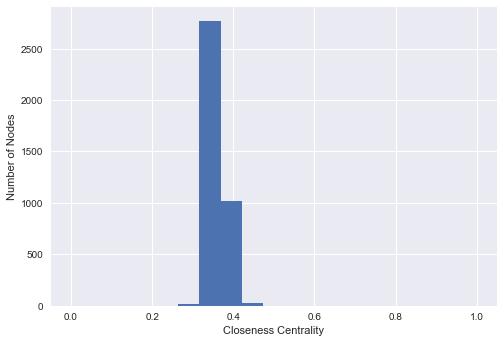

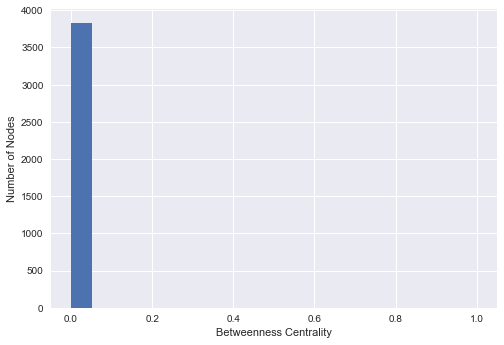

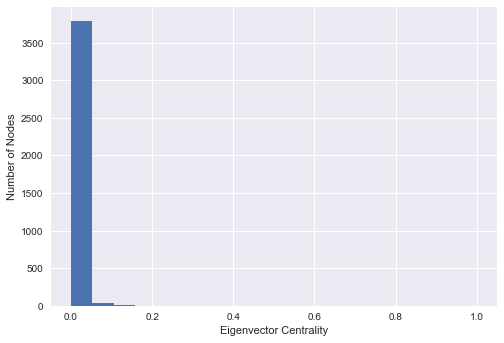

In [7]:
import numpy as np
import matplotlib as mp
import pandas as pd
from pandas import DataFrame as Df
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import xml.etree.ElementTree as ET
import networkx as nx
from collections import defaultdict

def L1(v1,v2):
    if(len(v1)!=len(v2)):
        print('error')
        return -1
    return sum([abs(v1[i]-v2[i]) for i in range(len(v1))])

def graphData(cent,xlabel):    
    
    plt.hist(cent,bins=np.linspace(0,1,20))
    plt.xlabel(xlabel)
    _=plt.ylabel('Number of Nodes')
    plt.show()

path = '/Users/JohnSpinelli/desktop/userData.csv'
mergedPosts = Df.from_csv(path)
questionIds = mergedPosts['QuestionUserId']
answerIds = mergedPosts['AnswerUserId']
g = nx.Graph()
g.add_nodes_from(questionIds)
g.add_nodes_from(answerIds)

g.add_edges_from([(questionIds[x],answerIds[x]) for x in range(len(questionIds))])


Gc = max(nx.connected_component_subgraphs(g),key=len)
Gc.remove_edges_from(Gc.selfloop_edges())

KcoreGc = nx.k_core(Gc)

cent1 = np.array(list(nx.closeness_centrality(KcoreGc).values()))
cent2 = np.array(list(nx.betweenness_centrality(KcoreGc).values()))
cent3 = np.array(list(nx.eigenvector_centrality(KcoreGc).values()))

Lcent12 = L1(cent1,cent2)
Lcent23 = L1(cent2,cent3)
Lcent13 = L1(cent1,cent3)        

print('L1 Distance between closeness and betweenness:' + str(Lcent12))  
print('L1 Distance between eigenvector and betweenness:' + str(Lcent23)) 
print('L1 Distance between closeness and eigenvector:' + str(Lcent13)) 


graphData(cent1,'Closeness Centrality')
graphData(cent2,'Betweenness Centrality')
graphData(cent3,'Eigenvector Centrality')



## Step 3
Again working with the largest connected component, use two different methods for identifying communities (partitions of the graph). Visualize your results and compare the output of the two methods using standard clustering comparison methods we discussed in the class.